# Last Mile Delivery Analysis 

In [283]:
import pandas as pd

In [284]:
delivery =pd.read_csv(r"deliveries.csv")

In [285]:
items = pd.read_csv(r"order_items.csv")

In [286]:
orders = pd.read_csv(r"orders.csv")

In [287]:
products = pd.read_csv(r"products.csv")

In [288]:
delivery

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [289]:
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])

In [290]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   order_id    1363008 non-null  int64         
 1   time_stamp  1363008 non-null  datetime64[ns]
 2   status      1363008 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ MB


In [291]:
delivery.tail(10)

,order_id,time_stamp,status
1362998,321684444,2024-01-31 23:48:14.792822053,Delivered
1362999,321684443,2024-01-31 23:50:06.640104742,Delivered
1363000,321684449,2024-01-31 23:55:46.000000000,Pending
1363001,321684447,2024-01-31 23:56:35.426400154,Delivered
1363002,321684448,2024-01-31 23:58:05.000000000,Pending
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered
1363007,321684448,2024-02-01 00:17:50.996900711,Delivered


# 1.) What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?
### Round off the answer upto 2 decimal places.

In [292]:
ordered_time = delivery[delivery['status'] == 'Pending'][['order_id', 'time_stamp']].set_index('order_id')
delivered_time = delivery[delivery['status'] == 'Delivered'][['order_id', 'time_stamp']].set_index('order_id')

In [293]:
time_stamp = (delivered_time - ordered_time).reset_index()

In [421]:
time_stamp['time_stamp'].mean()

Timedelta('0 days 00:20:38.853646244')

+ The average delivery time taken in minutes is 20.39mins

# 2.) What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [410]:
time_stamp['time_stamp'].quantile(0.99)

Timedelta('0 days 00:30:53.725475329')

+ 99th percentile delivery time taken by the store to deliver the pizzas is 30.53mins

# 3.) What is the order id with the maximum delivery time?

In [463]:
time_diffs = time_diff.max()

In [453]:
time_diffs

321629049

+ The order id with maximum delivery time is 321629049

# 4.) How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [297]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [299]:
delivery

,order_id,time_stamp,status,month_year
0,321230114,2020-12-11 00:01:29.000000000,Pending,2020-12
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery,2020-12
2,321230114,2020-12-11 00:19:13.299151076,Delivered,2020-12
3,321230115,2020-12-11 00:36:02.000000000,Pending,2020-12
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery,2020-12
...,...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered,2024-01
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery,2024-02
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery,2024-02
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered,2024-02


In [300]:
time_stamp

,order_id,time_stamp
0,321230114,0 days 00:17:44.299151076
1,321230115,0 days 00:23:16.054846609
2,321230116,0 days 00:18:51.153042625
3,321230117,0 days 00:17:17.430088094
4,321230118,0 days 00:18:07.488575946
...,...,...
454331,321684445,0 days 00:18:03.185192716
454332,321684446,0 days 00:17:54.494812502
454333,321684447,0 days 00:20:27.426400154
454334,321684448,0 days 00:19:45.996900711


In [301]:
delivery['year'] = delivery['month_year'].dt.year
delivery['month'] = delivery['month_year'].dt.month

In [302]:
order=pd.merge(time_stamp,delivery,on='order_id',how='inner')

In [307]:
order['order_id'].nunique()

454336

In [310]:
order

,order_id,time_stamp,year,month
0,321230114,0 days 00:17:44.299151076,2020,12
3,321230115,0 days 00:23:16.054846609,2020,12
6,321230116,0 days 00:18:51.153042625,2020,12
9,321230117,0 days 00:17:17.430088094,2020,12
12,321230118,0 days 00:18:07.488575946,2020,12
...,...,...,...,...
1362993,321684445,0 days 00:18:03.185192716,2024,1
1362996,321684446,0 days 00:17:54.494812502,2024,1
1362999,321684447,0 days 00:20:27.426400154,2024,1
1363002,321684448,0 days 00:19:45.996900711,2024,1


In [311]:
order[(order['year']==2024) & (order['month']==1)]

,order_id,time_stamp,year,month
1326096,321672146,0 days 00:19:14.105365820,2024,1
1326099,321672147,0 days 00:23:04.366818534,2024,1
1326102,321672148,0 days 00:17:33.702273281,2024,1
1326105,321672149,0 days 00:19:29.968308274,2024,1
1326108,321672150,0 days 00:16:47.546601236,2024,1
...,...,...,...,...
1362993,321684445,0 days 00:18:03.185192716,2024,1
1362996,321684446,0 days 00:17:54.494812502,2024,1
1362999,321684447,0 days 00:20:27.426400154,2024,1
1363002,321684448,0 days 00:19:45.996900711,2024,1


In [312]:
final=pd.merge(order,items,on='order_id',how='inner')

In [313]:
final

,order_id,time_stamp,year,month,items_ordered
0,321230114,0 days 00:17:44.299151076,2020,12,"['p_025', 'p_032', 'p_037']"
1,321230115,0 days 00:23:16.054846609,2020,12,"['p_017', 'p_012']"
2,321230116,0 days 00:18:51.153042625,2020,12,"['p_027', 'p_037']"
3,321230117,0 days 00:17:17.430088094,2020,12,"['p_004', 'p_029']"
4,321230118,0 days 00:18:07.488575946,2020,12,"['p_017', 'p_037']"
...,...,...,...,...,...
454331,321684445,0 days 00:18:03.185192716,2024,1,"['p_002', 'p_006', 'p_037']"
454332,321684446,0 days 00:17:54.494812502,2024,1,"['p_015', 'p_013']"
454333,321684447,0 days 00:20:27.426400154,2024,1,"['p_009', 'p_016']"
454334,321684448,0 days 00:19:45.996900711,2024,1,"['p_007', 'p_003', 'p_037']"


In [360]:
import re

In [ ]:
final['items_ordered']=final['items_ordered'].apply(lambda x: (",".join(re.findall(r'[p_0-9]+',x))).split(','))

In [362]:
explode = final.explode('items_ordered').reset_index(drop=True)

In [322]:
explode[(explode['year']==2024) & (explode['month']==1)]

,order_id,time_stamp,year,month,item_id
1127535,321672146,0 days 00:19:14.105365820,2024,1,p_020
1127537,321672147,0 days 00:23:04.366818534,2024,1,p_004
1127538,321672147,0 days 00:23:04.366818534,2024,1,p_031
1127540,321672148,0 days 00:17:33.702273281,2024,1,p_009
1127541,321672148,0 days 00:17:33.702273281,2024,1,p_002
...,...,...,...,...,...
1158886,321684447,0 days 00:20:27.426400154,2024,1,p_009
1158887,321684447,0 days 00:20:27.426400154,2024,1,p_016
1158888,321684448,0 days 00:19:45.996900711,2024,1,p_007
1158889,321684448,0 days 00:19:45.996900711,2024,1,p_003


+ Total of 20951 pizzas are ordered between 1st to 31st january 2024.

# 5.) How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

### This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.

In [335]:
delayed = order[order['time_stamp'] > pd.Timedelta(minutes=30)]

In [336]:
delayed

,order_id,time_stamp,year,month
72,321230138,0 days 00:30:17.711036623,2020,12
582,321230308,0 days 00:30:28.793171773,2020,12
843,321230395,0 days 00:30:04.289421657,2020,12
867,321230403,0 days 00:35:18.694171362,2020,12
1029,321230457,0 days 00:33:54.815282886,2020,12
...,...,...,...,...
1361742,321684028,0 days 00:32:24.900528163,2024,1
1362042,321684128,0 days 00:42:45.508245394,2024,1
1362456,321684266,0 days 00:31:01.613185573,2024,1
1362792,321684378,0 days 00:30:13.707616698,2024,1


In [341]:
more_time = delayed[(delayed['year']==2024) & (delayed['month']==1)]

In [419]:
more_time['order_id'].nunique()

162

+ Total of 162 orders took more than 30mins to deliver between 1st to 31st january 2024.

# 6.) What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [365]:
explode.rename(columns={'items_ordered':'item_id'},inplace=True)

In [366]:
explode

,order_id,time_stamp,year,month,item_id
0,321230114,0 days 00:17:44.299151076,2020,12,p_025
1,321230114,0 days 00:17:44.299151076,2020,12,p_032
2,321230114,0 days 00:17:44.299151076,2020,12,p_037
3,321230115,0 days 00:23:16.054846609,2020,12,p_017
4,321230115,0 days 00:23:16.054846609,2020,12,p_012
...,...,...,...,...,...
1158888,321684448,0 days 00:19:45.996900711,2024,1,p_007
1158889,321684448,0 days 00:19:45.996900711,2024,1,p_003
1158890,321684448,0 days 00:19:45.996900711,2024,1,p_037
1158891,321684449,0 days 00:19:10.997433391,2024,1,p_022


In [383]:
refund = pd.merge(explode,products,on='item_id',how='inner')

In [384]:
refund

,order_id,time_stamp,year,month,item_id,category,Item,Size,Price
0,321230114,0 days 00:17:44.299151076,2020,12,p_025,Non Veg,Chicken Dominator,Regular,365
1,321230125,0 days 00:21:27.429084233,2020,12,p_025,Non Veg,Chicken Dominator,Regular,365
2,321230132,0 days 00:17:26.192638615,2020,12,p_025,Non Veg,Chicken Dominator,Regular,365
3,321230136,0 days 00:24:44.175141823,2020,12,p_025,Non Veg,Chicken Dominator,Regular,365
4,321230174,0 days 00:17:45.140170569,2020,12,p_025,Non Veg,Chicken Dominator,Regular,365
...,...,...,...,...,...,...,...,...,...
1158888,321684344,0 days 00:17:17.198293573,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158889,321684386,0 days 00:19:00.984373283,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158890,321684398,0 days 00:19:42.512111920,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158891,321684401,0 days 00:16:25.304076752,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609


In [385]:
losses = refund[refund['time_stamp'] > pd.Timedelta(minutes=30)]

In [386]:
losses

,order_id,time_stamp,year,month,item_id,category,Item,Size,Price
401,321238643,0 days 00:34:06.856489733,2021,1,p_025,Non Veg,Chicken Dominator,Regular,365
426,321239081,0 days 00:30:17.555996385,2021,1,p_025,Non Veg,Chicken Dominator,Regular,365
701,321245436,0 days 00:36:35.694895642,2021,1,p_025,Non Veg,Chicken Dominator,Regular,365
705,321245554,0 days 00:33:37.523015617,2021,1,p_025,Non Veg,Chicken Dominator,Regular,365
788,321247444,0 days 00:34:10.802926807,2021,1,p_025,Non Veg,Chicken Dominator,Regular,365
...,...,...,...,...,...,...,...,...,...
1158568,321677746,0 days 00:31:01.688904223,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158695,321680493,0 days 00:30:55.188989845,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158812,321682815,0 days 00:35:53.184852429,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609
1158814,321682824,0 days 00:30:04.481924415,2024,1,p_035,Non Veg,Chicken Pepperoni,Medium,609


In [393]:
total_amount = losses[(losses['year']==2023)]

In [394]:
total_amount

,order_id,time_stamp,year,month,item_id,Price
13764,321522804,0 days 00:30:25.263149776,2023,1,p_025,365
13769,321522911,0 days 00:30:02.537262813,2023,1,p_025,365
13815,321523841,0 days 00:30:23.078746955,2023,1,p_025,365
13828,321524139,0 days 00:31:02.133377047,2023,1,p_025,365
13842,321524353,0 days 00:37:00.317150442,2023,1,p_025,365
...,...,...,...,...,...,...
1157969,321664928,0 days 00:33:40.082755283,2023,12,p_035,609
1158002,321665498,0 days 00:35:01.564474737,2023,12,p_035,609
1158003,321665498,0 days 00:35:01.564474737,2023,12,p_035,609
1158141,321668379,0 days 00:32:17.699351406,2023,12,p_035,609


In [414]:
total_amount['Price'].sum()

1826393

+  The total amount Pizza store lost in 2023 due to refunds on late deliveries is 1826393

# 7.) In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [402]:
total_amount1 = losses[(losses['year']==2020)]
total_amount1['Price'].sum()

96688

In [403]:
total_amount2 = losses[(losses['year']==2021)]
total_amount2['Price'].sum()

1791568

In [404]:
total_amount3 = losses[(losses['year']==2022)]
total_amount3['Price'].sum()

1664113

In [405]:
total_amount4 = losses[(losses['year']==2023)]
total_amount4['Price'].sum()

1826393

In [406]:
total_amount5 = losses[(losses['year']==2024)]
total_amount5['Price'].sum()

145669

+ In '2023' pizza store lost maximum amount.

# 8.) How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [407]:
revenue = refund[refund['time_stamp'] < pd.Timedelta(minutes=30)]

In [409]:
revenue['Price'].sum()

402310056

# (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

## Implement the above question on Jupyter Notebook. Upload your implementation on your google drive and share the link below.

In [444]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [457]:
orders['year'] = orders['order_placed_at'].dt.year
orders['month'] = orders['order_placed_at'].dt.month
orders['date'] = orders['order_placed_at'].dt.date
orders['hour'] = orders['order_placed_at'].dt.hour

In [458]:
orders

,order_id,order_placed_at,year,month,date,hour
0,321230114,2020-12-11 00:01:29,2020,12,2020-12-11,0
1,321230115,2020-12-11 00:36:02,2020,12,2020-12-11,0
2,321230116,2020-12-11 00:55:01,2020,12,2020-12-11,0
3,321230117,2020-12-11 01:05:27,2020,12,2020-12-11,1
4,321230118,2020-12-11 01:14:20,2020,12,2020-12-11,1
...,...,...,...,...,...,...
454331,321684445,2024-01-31 23:27:51,2024,1,2024-01-31,23
454332,321684446,2024-01-31 23:40:14,2024,1,2024-01-31,23
454333,321684447,2024-01-31 23:36:08,2024,1,2024-01-31,23
454334,321684448,2024-01-31 23:58:05,2024,1,2024-01-31,23


In [459]:
bonus = orders.groupby(['date','hour'])['order_id'].count().reset_index()

In [460]:
bonus

,date,hour,order_id
0,2020-12-11,0,3
1,2020-12-11,1,4
2,2020-12-11,2,4
3,2020-12-11,3,9
4,2020-12-11,4,6
...,...,...,...
27449,2024-01-31,19,12
27450,2024-01-31,20,16
27451,2024-01-31,21,11
27452,2024-01-31,22,4


In [466]:
bonus.rename({'order_id':'count'},axis=1,inplace=True)

In [468]:
import numpy as np

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns

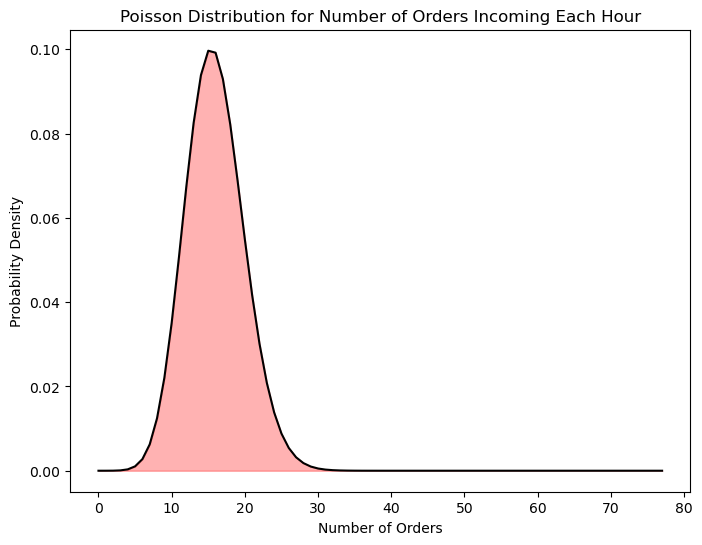

In [472]:
from scipy.stats import poisson
orders_per_hour = list(bonus['count'])[0:1000]
avg_orders_per_hour = np.mean(orders_per_hour)
x = np.arange(0, max(orders_per_hour) + 1)
pdf = poisson.pmf(x, mu=avg_orders_per_hour)
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color='black', label='Poisson KDE')
plt.fill_between(x, pdf, color='red', alpha=0.3)
plt.title('Poisson Distribution for Number of Orders Incoming Each Hour')
plt.xlabel('Number of Orders')
plt.ylabel('Probability Density')
plt.gca().set_facecolor('white')
plt.show()

+ The Poisson distribution is commonly used to model the number of events that occur in a fixed interval of time or space, making it suitable for modeling the number of orders incoming each hour for a Pizza Store.

+ By this we can predict the number of orders that the store is likely to receive in the upcoming hours or days.

+ We can forecast the quantity of ingredients needed for the next hours or days.